# Calibrators for Classification in sklearn

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss

In [95]:
# 1. Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=2, n_redundant=2,
                           n_classes=2, flip_y=0.2,
                           random_state=12)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
# 2. Define the classifiers to compare
# A model known for uncalibrated probabilities (LinearSVC)
clf_svc = SVC(C=1.0, random_state=42, probability=True, kernel='linear')

# A model with a calibration wrapper
calibrated_svc = CalibratedClassifierCV(clf_svc, method='isotonic', cv=5)
calibrated_svc_sig = CalibratedClassifierCV(clf_svc, method='sigmoid', cv=5)

# A Naive Bayes model (often well-calibrated by nature)
clf_nb = GaussianNB()

In [99]:
# 3. Train the models
clf_svc.fit(X_train, y_train)
calibrated_svc.fit(X_train, y_train)
calibrated_svc_sig.fit(X_train, y_train)
clf_nb.fit(X_train, y_train)

GaussianNB()

In [109]:
# 4. Predict probabilities on the test set
prob_pos_svc = clf_svc.predict_proba(X_test)[:, 1]
prob_pos_calibrated_svc = calibrated_svc.predict_proba(X_test)[:, 1]
prob_calibrated_svc_sig = calibrated_svc_sig.predict_proba(X_test)[:, 1]
prob_pos_nb = clf_nb.predict_proba(X_test)[:, 1]

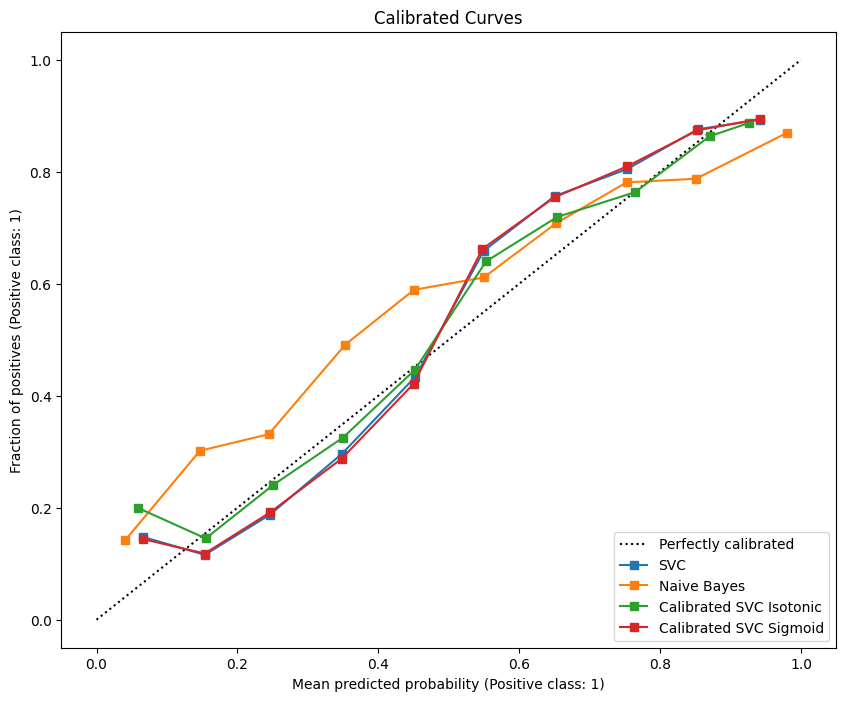

In [111]:
# Defining the figure
fig = plt.figure(figsize=(10, 8))

# List of models and names to display on the plot
clf_list = [
    (clf_svc, "SVC"),
    (clf_nb, "Naive Bayes"),
    (calibrated_svc, "Calibrated SVC Isotonic"),
    (calibrated_svc_sig, "Calibrated SVC Sigmoid")
]

ax_calibration_curve = fig.add_subplot()
for i, (clf, name) in enumerate(clf_list):
  display = CalibrationDisplay.from_estimator(clf,
                                    X_test, y_test,
                                    n_bins=10,
                                    name=name,
                                    ax=ax_calibration_curve)
plt.title('Calibrated Curves')
plt.show()

In [114]:
# 6. Calculate Brier Scores for a quantitative comparison
brier_svc = brier_score_loss(y_test, prob_pos_svc)
brier_calibrated_svc = brier_score_loss(y_test, prob_pos_calibrated_svc)
brier_calibrated_svc_sig = brier_score_loss(y_test, prob_calibrated_svc_sig)
brier_nb = brier_score_loss(y_test, prob_pos_nb)
print(f"Brier score for uncalibrated SVC: {brier_svc:.4f}")
print(f"Brier score for calibrated SVC: {brier_calibrated_svc:.4f}")
print(f"Brier score for calibrated SVC Sigmoid: {brier_calibrated_svc_sig:.4f}")
print(f"Brier score for Naive Bayes: {brier_nb:.4f}")

Brier score for uncalibrated SVC: 0.1579
Brier score for calibrated SVC: 0.1543
Brier score for calibrated SVC Sigmoid: 0.1579
Brier score for Naive Bayes: 0.1651
